In [1]:
 import numpy as np
 import pandas as pd
 from matplotlib import pyplot as plt

 import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
series = np.sin(0.1 * np.arange(200)) #+ np.random.randn(200)

T = 10 # Let's make it each 10 arrays in X dataset

D = 1

X=[]
Y=[]

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)

  y = series[t+T]
  Y.append(y)

#Now both returns list.We have to reshape our X to N,T,D shape.Since our D = 1 and we have 19 instances with the 10 elements each of'em has (in total 190 elements), it will return (19,10,1)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

print("For CNN, shape of the X:"+ str(X.shape))
print("For CNN, shape of the Y:"+ str(Y.shape)) # Shape of the Y is coherent RNN,which is a vector


For CNN, shape of the X:(190, 10, 1)
For CNN, shape of the Y:(190,)


In [3]:
i = Input(shape=(T,D))
x = SimpleRNN(5, )(i)  # When the activation is not defined, it takes "tanh" as default.
x = Dense(1)(x)         # Since it's a linear model, we don't specify any activation for the last layer

model = Model(i,x)

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1)
)

In [4]:
# Training Section

N = len(X)

X.shape
r=model.fit(X[:-N//2], Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=80)


Epoch 1/80
3/3 [==============================] - 5s 344ms/step - loss: 0.2994 - val_loss: 0.0454
Epoch 2/80
3/3 [==============================] - 0s 44ms/step - loss: 0.0386 - val_loss: 0.0418
Epoch 3/80
3/3 [==============================] - 0s 45ms/step - loss: 0.0419 - val_loss: 0.0180
Epoch 4/80
3/3 [==============================] - 0s 43ms/step - loss: 0.0296 - val_loss: 0.0142
Epoch 5/80
3/3 [==============================] - 0s 48ms/step - loss: 0.0160 - val_loss: 0.0183
Epoch 6/80
3/3 [==============================] - 0s 63ms/step - loss: 0.0179 - val_loss: 0.0142
Epoch 7/80
3/3 [==============================] - 0s 40ms/step - loss: 0.0097 - val_loss: 0.0052
Epoch 8/80
3/3 [==============================] - 0s 37ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 9/80
3/3 [==============================] - 0s 39ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 10/80
3/3 [==============================] - 0s 72ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 11/80
3/3 [===========

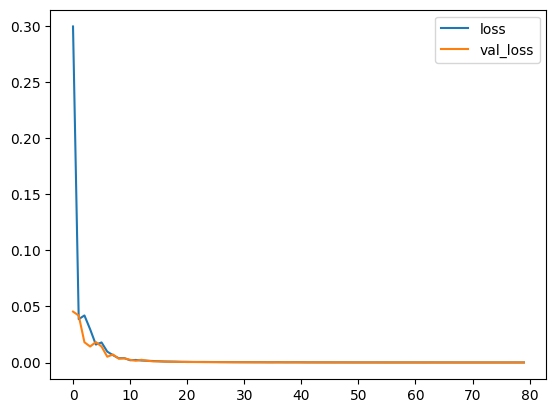

In [5]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 29ms/step


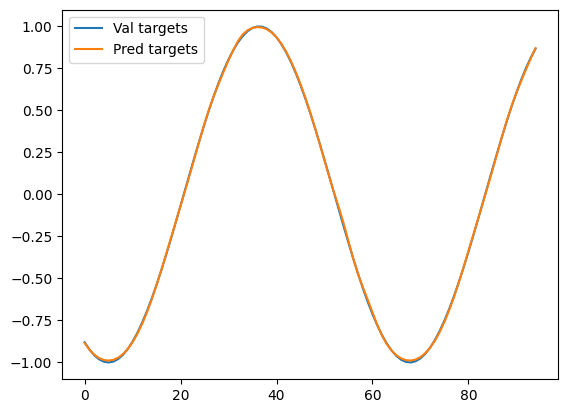

In [6]:
#Autoregressive Model 
 
#(Linear Models)

# Autoregressive Models are actually linear models.So if there's non-linearity in our data or model, it can cause performance issues.
# In this method, we used previously known data to predict new datas and we we did'nt use the predicted datas for further predictions.
# So,it's not the right way to apply CNN.In order to apply CNN as it should, we have to use our predicted datas to predict further data.
# SO IT'S THE WRONG FORECASTING WAY
validation_targets = Y[-N//2:]
predicted_targets = []

i  = -N//2

while len(predicted_targets) < len(validation_targets):
  p=model.predict(X[i].reshape(-1,T,1))[0,0] # to get the 1 x 1 array as y value 
  predicted_targets.append(p)
  i+=1


plt.plot(validation_targets,label="Val targets")
plt.plot(predicted_targets,label="Pred targets")
plt.legend()
plt.show()


In [7]:
# As we said: In order to apply CNN as it should, we have to use our predicted datas to predict further data.So we'll do that here
# SO IT'S THE TRUE FORECASTING WAY

validation_predictions = []
validation_data = Y[-N//2:]

i = X[-N//2] # Note that it's an array length of 10 (size of (10 x 1) as CNN expected)

while len(validation_predictions) < len(validation_data):
  p = model.predict(i.reshape(1,-1,1))[0,0]  # it reshapes it to (1,10,1) since the CNN expects
  validation_predictions.append(p)

  i = np.roll(i,-1) # it will take the first value and replace it to the last.(Ex: before;[1,2,3]   after;[2,3,1])
  i[-1] = p         # Now it changes the last value (which is the oldest value) to the new one that we predicted



1/1 [==============================] - 0s 25ms/step


In [8]:
print(i.shape)
i = i.reshape(1,-1,1)
print(i.shape)

# Considering the shape of i, it's the same whether we use reshape(1,T,-1) or (1,-1,1).

(10, 1)
(1, 10, 1)


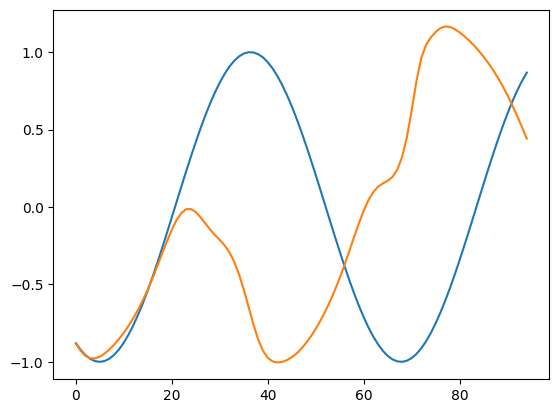

In [9]:
plt.plot(validation_data,label="Val_data")
plt.plot(validation_predictions,label="pred_data")

In [10]:
# So it has the pattern but still not a good model

# Important Note:
 Autoregressive models are linear models and thus assume a linear relationship between our features and the target. In situations where there is non-linearity, this could cause performance issues. RNNs, especially when stacked on more RNNs or on dense layers (a dense layer is a layer of normal neural net neurons), can detect and capture all the nonlinear relationships in our data. In fact, with RNNs (and neural nets in general) we should worry more about over-fitting rather than under-fitting.

# Using  Different Activation Functions

activation=None:



In [11]:
i = Input(shape=(T,D))
x = SimpleRNN(5,activation = None )(i)  # When the activation is not defined, it takes "tanh" as default.
x = Dense(1)(x)         # Since it's a linear model, we don't specify any activation for the last layer

model = Model(i,x)

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1)
)

In [12]:
# Training Section

N = len(X)

X.shape
r=model.fit(X[:-N//2], Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=80)


Epoch 1/80
3/3 [==============================] - 1s 145ms/step - loss: 1.5488 - val_loss: 0.4430
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.4588 - val_loss: 0.2598
Epoch 3/80
3/3 [==============================] - 0s 32ms/step - loss: 0.2672 - val_loss: 0.1329
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1064 - val_loss: 0.0642
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0479 - val_loss: 0.0209
Epoch 6/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0184 - val_loss: 0.0486
Epoch 7/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0471 - val_loss: 0.0714
Epoch 8/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0264 - val_loss: 0.0041
Epoch 9/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0028 - val_loss: 0.0071
Epoch 11/80
3/3 [===========

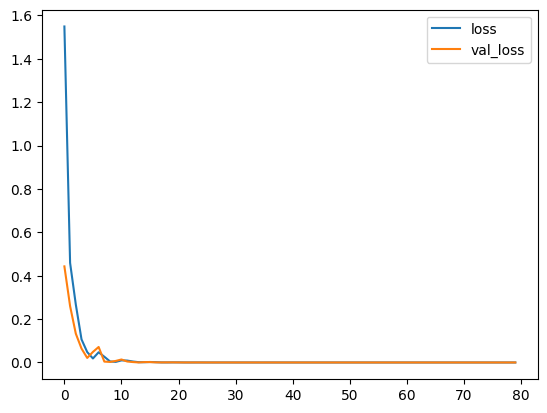

In [13]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 28ms/step


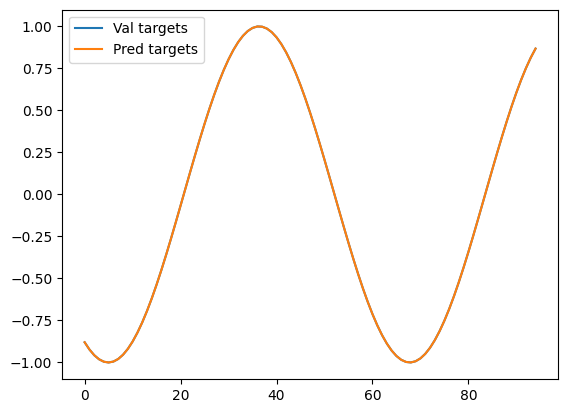

In [14]:
#Autoregressive Model 
 
#(Linear Models)

# Autoregressive Models are actually linear models.So if there's non-linearity in our data or model, it can cause performance issues.
# In this method, we used previously known data to predict new datas and we we did'nt use the predicted datas for further predictions.
# So,it's not the right way to apply CNN.In order to apply CNN as it should, we have to use our predicted datas to predict further data.
# SO IT'S THE WRONG FORECASTING WAY
validation_targets = Y[-N//2:]
predicted_targets = []

i  = -N//2

while len(predicted_targets) < len(validation_targets):
  p=model.predict(X[i].reshape(-1,T,1))[0,0] # to get the 1 x 1 array as y value 
  predicted_targets.append(p)
  i+=1


plt.plot(validation_targets,label="Val targets")
plt.plot(predicted_targets,label="Pred targets")
plt.legend()
plt.show()


In [18]:
# As we said: In order to apply CNN as it should, we have to use our predicted datas to predict further data.So we'll do that here
# SO IT'S THE TRUE FORECASTING WAY

validation_predictions = []
validation_data = Y[-N//2:]

i = X[-N//2] # Note that it's an array length of 10 (size of (10 x 1) as CNN expected)

while len(validation_predictions) < len(validation_data):
  p = model.predict(i.reshape(1,-1,1))[0,0]  # it reshapes it to (1,10,1) since the CNN expects
  validation_predictions.append(p)

  i = np.roll(i,-1) # it will take the first value and replace it to the last.(Ex: before;[1,2,3]   after;[2,3,1])
  i[-1] = p         # Now it changes the last value (which is the oldest value) to the new one that we predicted



1/1 [==============================] - 0s 25ms/step


In [16]:
print(i.shape)
i = i.reshape(1,-1,1)
print(i.shape)

# Considering the shape of i, it's the same whether we use reshape(1,T,-1) or (1,-1,1).

(10, 1)
(1, 10, 1)


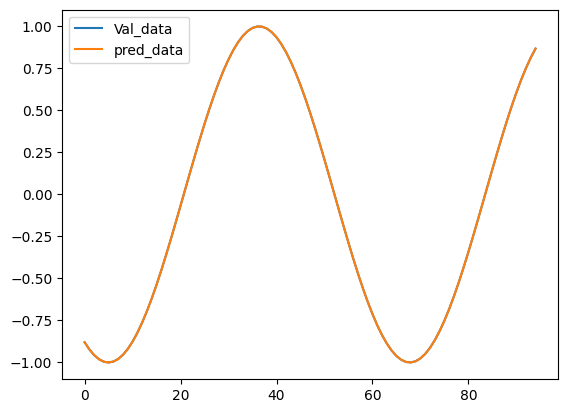

In [20]:
plt.plot(validation_data,label="Val_data")
plt.plot(validation_predictions,label="pred_data")
plt.legend()
plt.show()
#It's perfectly fitted.
#It^s because, RNN without activation (which means "None") is basically linear model.Also our dataset is perfectly eligible for linear regression.Due to those reasons, model is applied very efficiently

# Using Noise:

In [21]:
 import numpy as np
 import pandas as pd
 from matplotlib import pyplot as plt

 import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [22]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)

T = 10 # Let's make it each 10 arrays in X dataset

D = 1

X=[]
Y=[]

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)

  y = series[t+T]
  Y.append(y)

#Now both returns list.We have to reshape our X to N,T,D shape.Since our D = 1 and we have 19 instances with the 10 elements each of'em has (in total 190 elements), it will return (19,10,1)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

print("For CNN, shape of the X:"+ str(X.shape))
print("For CNN, shape of the Y:"+ str(Y.shape)) # Shape of the Y is coherent RNN,which is a vector


For CNN, shape of the X:(190, 10, 1)
For CNN, shape of the Y:(190,)


In [23]:
i = Input(shape=(T,D))
x = SimpleRNN(5, )(i)  # When the activation is not defined, it takes "tanh" as default.
x = Dense(1)(x)         # Since it's a linear model, we don't specify any activation for the last layer

model = Model(i,x)

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1)
)

In [24]:
# Training Section

N = len(X)

X.shape
r=model.fit(X[:-N//2], Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=80)


Epoch 1/80
3/3 [==============================] - 1s 155ms/step - loss: 1.7070 - val_loss: 1.4806
Epoch 2/80
3/3 [==============================] - 0s 31ms/step - loss: 1.1729 - val_loss: 1.2651
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 1.1456 - val_loss: 1.2027
Epoch 4/80
3/3 [==============================] - 0s 30ms/step - loss: 1.0686 - val_loss: 1.2152
Epoch 5/80
3/3 [==============================] - 0s 23ms/step - loss: 1.0363 - val_loss: 1.3128
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 1.0457 - val_loss: 1.3683
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.9814 - val_loss: 1.3321
Epoch 8/80
3/3 [==============================] - 0s 24ms/step - loss: 0.9958 - val_loss: 1.2682
Epoch 9/80
3/3 [==============================] - 0s 29ms/step - loss: 0.9664 - val_loss: 1.2955
Epoch 10/80
3/3 [==============================] - 0s 30ms/step - loss: 0.9634 - val_loss: 1.2562
Epoch 11/80
3/3 [===========

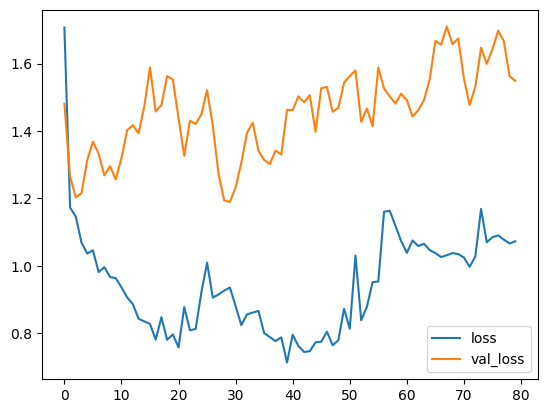

In [25]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 51ms/step


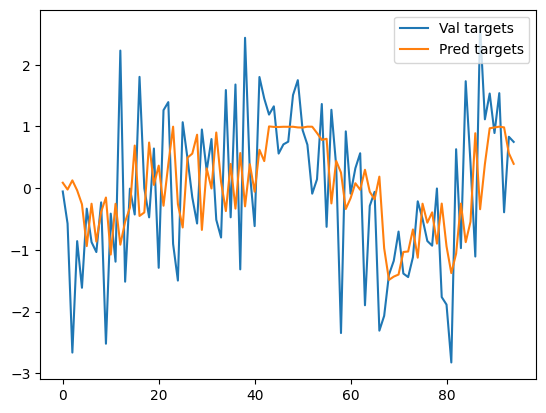

In [26]:
#Autoregressive Model (with Noised Datased)
 
#(Linear Models)

# Autoregressive Models are actually linear models.So if there's non-linearity in our data or model, it can cause performance issues.
# In this method, we used previously known data to predict new datas and we we did'nt use the predicted datas for further predictions.
# So,it's not the right way to apply CNN.In order to apply CNN as it should, we have to use our predicted datas to predict further data.
# SO IT'S THE WRONG FORECASTING WAY
validation_targets = Y[-N//2:]
predicted_targets = []

i  = -N//2

while len(predicted_targets) < len(validation_targets):
  p=model.predict(X[i].reshape(-1,T,1))[0,0] # to get the 1 x 1 array as y value 
  predicted_targets.append(p)
  i+=1


plt.plot(validation_targets,label="Val targets")
plt.plot(predicted_targets,label="Pred targets")
plt.legend()
plt.show()


In [27]:
# As we said: In order to apply CNN as it should, we have to use our predicted datas to predict further data.So we'll do that here
# SO IT'S THE TRUE FORECASTING WAY

validation_predictions = []
validation_data = Y[-N//2:]

i = X[-N//2] 

while len(validation_predictions) < len(validation_data):
  p = model.predict(i.reshape(1,-1,1))[0,0]  
  validation_predictions.append(p)

  i = np.roll(i,-1) 
  i[-1] = p         



1/1 [==============================] - 0s 24ms/step


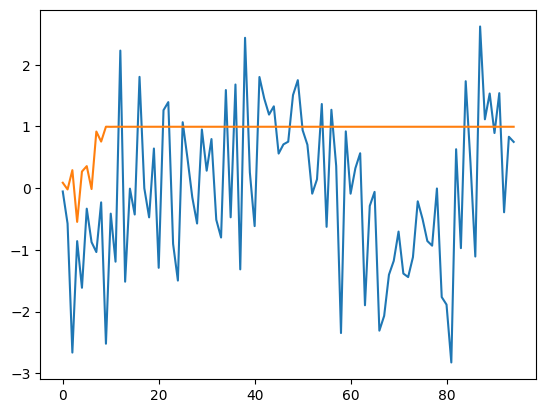

In [28]:
plt.plot(validation_data,label="Val_data")
plt.plot(validation_predictions,label="pred_data")

In [29]:
# So it bad

# Using  Different Activation Functions (with Noisy Dateset)

activation=None:



In [30]:
i = Input(shape=(T,D))
x = SimpleRNN(5,activation = None )(i)  # When the activation is not defined, it takes "tanh" as default.
x = Dense(1)(x)         # Since it's a linear model, we don't specify any activation for the last layer

model = Model(i,x)

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1)
)

In [31]:
# Training Section

N = len(X)

X.shape
r=model.fit(X[:-N//2], Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=80)


Epoch 1/80
3/3 [==============================] - 1s 160ms/step - loss: 3.0288 - val_loss: 1.5811
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 1.8538 - val_loss: 1.4908
Epoch 3/80
3/3 [==============================] - 0s 23ms/step - loss: 1.4121 - val_loss: 1.6003
Epoch 4/80
3/3 [==============================] - 0s 30ms/step - loss: 1.4343 - val_loss: 1.6133
Epoch 5/80
3/3 [==============================] - 0s 31ms/step - loss: 1.3518 - val_loss: 1.6375
Epoch 6/80
3/3 [==============================] - 0s 26ms/step - loss: 1.3386 - val_loss: 1.6267
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 1.2637 - val_loss: 1.5334
Epoch 8/80
3/3 [==============================] - 0s 38ms/step - loss: 1.1892 - val_loss: 1.4301
Epoch 9/80
3/3 [==============================] - 0s 32ms/step - loss: 1.1091 - val_loss: 1.3928
Epoch 10/80
3/3 [==============================] - 0s 33ms/step - loss: 1.1022 - val_loss: 1.3677
Epoch 11/80
3/3 [===========

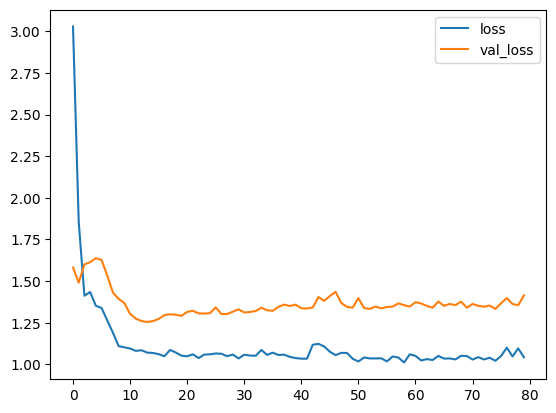

In [32]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 24ms/step


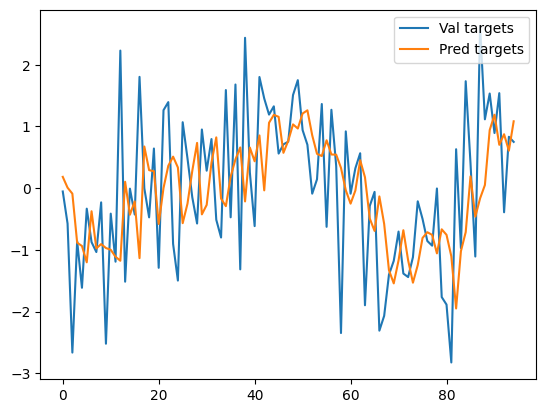

In [33]:
#Autoregressive Model 
 
#(Linear Models)

# Autoregressive Models are actually linear models.So if there's non-linearity in our data or model, it can cause performance issues.
# In this method, we used previously known data to predict new datas and we we did'nt use the predicted datas for further predictions.
# So,it's not the right way to apply CNN.In order to apply CNN as it should, we have to use our predicted datas to predict further data.
# SO IT'S THE WRONG FORECASTING WAY
validation_targets = Y[-N//2:]
predicted_targets = []

i  = -N//2

while len(predicted_targets) < len(validation_targets):
  p=model.predict(X[i].reshape(-1,T,1))[0,0] # to get the 1 x 1 array as y value 
  predicted_targets.append(p)
  i+=1


plt.plot(validation_targets,label="Val targets")
plt.plot(predicted_targets,label="Pred targets")
plt.legend()
plt.show()


In [34]:
# As we said: In order to apply CNN as it should, we have to use our predicted datas to predict further data.So we'll do that here
# SO IT'S THE TRUE FORECASTING WAY

validation_predictions = []
validation_data = Y[-N//2:]

i = X[-N//2] # Note that it's an array length of 10 (size of (10 x 1) as CNN expected)

while len(validation_predictions) < len(validation_data):
  p = model.predict(i.reshape(1,-1,1))[0,0]  # it reshapes it to (1,10,1) since the CNN expects
  validation_predictions.append(p)

  i = np.roll(i,-1) # it will take the first value and replace it to the last.(Ex: before;[1,2,3]   after;[2,3,1])
  i[-1] = p         # Now it changes the last value (which is the oldest value) to the new one that we predicted



1/1 [==============================] - 0s 34ms/step


In [35]:
print(i.shape)
i = i.reshape(1,-1,1)
print(i.shape)

# Considering the shape of i, it's the same whether we use reshape(1,T,-1) or (1,-1,1).

(10, 1)
(1, 10, 1)


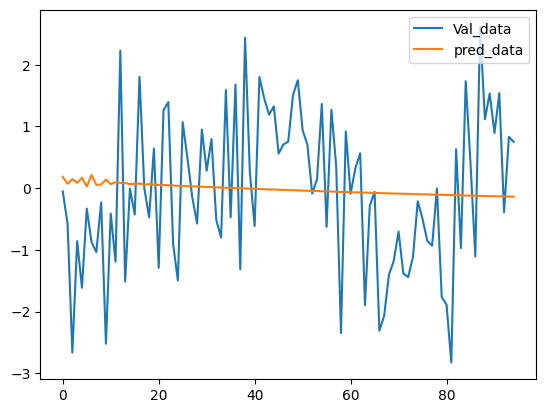

In [36]:
plt.plot(validation_data,label="Val_data")
plt.plot(validation_predictions,label="pred_data")
plt.legend()
plt.show()


Activation=ReLu

In [38]:
i = Input(shape=(T,D))
x = SimpleRNN(5,activation = "relu" )(i)  # When the activation is not defined, it takes "tanh" as default.
x = Dense(1)(x)         # Since it's a linear model, we don't specify any activation for the last layer

model = Model(i,x)

model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1))

In [39]:
# Training Section

N = len(X)

X.shape
r=model.fit(X[:-N//2], Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=80)


Epoch 1/80
3/3 [==============================] - 1s 140ms/step - loss: 1.5643 - val_loss: 1.4982
Epoch 2/80
3/3 [==============================] - 0s 32ms/step - loss: 1.3175 - val_loss: 1.6016
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 1.2421 - val_loss: 1.5402
Epoch 4/80
3/3 [==============================] - 0s 29ms/step - loss: 1.1619 - val_loss: 1.5082
Epoch 5/80
3/3 [==============================] - 0s 30ms/step - loss: 1.1209 - val_loss: 1.4627
Epoch 6/80
3/3 [==============================] - 0s 27ms/step - loss: 1.1177 - val_loss: 1.4396
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 1.1081 - val_loss: 1.4272
Epoch 8/80
3/3 [==============================] - 0s 23ms/step - loss: 1.1016 - val_loss: 1.4111
Epoch 9/80
3/3 [==============================] - 0s 23ms/step - loss: 1.1352 - val_loss: 1.4259
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 1.1140 - val_loss: 1.3941
Epoch 11/80
3/3 [===========

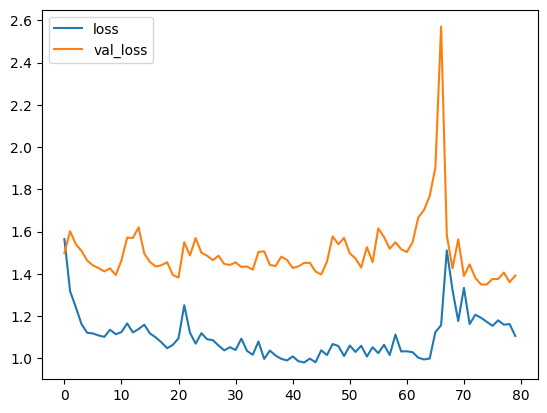

In [40]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 37ms/step


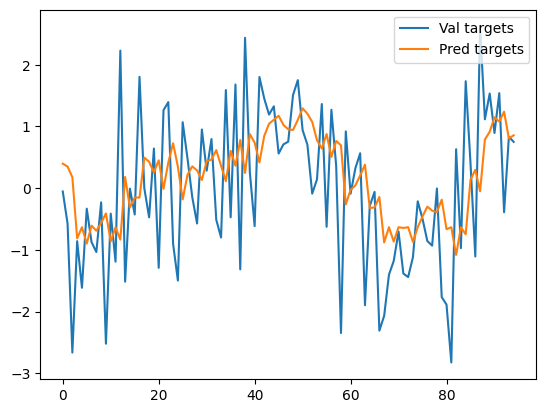

In [41]:
#Autoregressive Model 
 
#(Linear Models)

# Autoregressive Models are actually linear models.So if there's non-linearity in our data or model, it can cause performance issues.
# In this method, we used previously known data to predict new datas and we we did'nt use the predicted datas for further predictions.
# So,it's not the right way to apply CNN.In order to apply CNN as it should, we have to use our predicted datas to predict further data.
# SO IT'S THE WRONG FORECASTING WAY
validation_targets = Y[-N//2:]
predicted_targets = []

i  = -N//2

while len(predicted_targets) < len(validation_targets):
  p=model.predict(X[i].reshape(-1,T,1))[0,0] # to get the 1 x 1 array as y value 
  predicted_targets.append(p)
  i+=1


plt.plot(validation_targets,label="Val targets")
plt.plot(predicted_targets,label="Pred targets")
plt.legend()
plt.show()


In [42]:
# As we said: In order to apply CNN as it should, we have to use our predicted datas to predict further data.So we'll do that here
# SO IT'S THE TRUE FORECASTING WAY

validation_predictions = []
validation_data = Y[-N//2:]

i = X[-N//2] # Note that it's an array length of 10 (size of (10 x 1) as CNN expected)

while len(validation_predictions) < len(validation_data):
  p = model.predict(i.reshape(1,-1,1))[0,0]  # it reshapes it to (1,10,1) since the CNN expects
  validation_predictions.append(p)

  i = np.roll(i,-1) # it will take the first value and replace it to the last.(Ex: before;[1,2,3]   after;[2,3,1])
  i[-1] = p         # Now it changes the last value (which is the oldest value) to the new one that we predicted



1/1 [==============================] - 0s 24ms/step


In [43]:
print(i.shape)
i = i.reshape(1,-1,1)
print(i.shape)

# Considering the shape of i, it's the same whether we use reshape(1,T,-1) or (1,-1,1).

(10, 1)
(1, 10, 1)


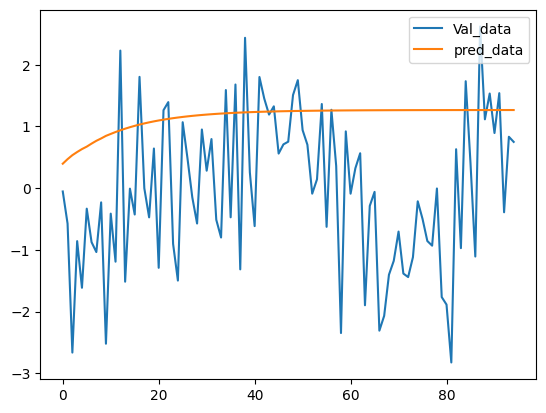

In [44]:
plt.plot(validation_data,label="Val_data")
plt.plot(validation_predictions,label="pred_data")
plt.legend()
plt.show()

#it's bad either.Because our dataset is inclined to a linear pattern.So the most efficient activation function is having no activation function,which is "None". (in default,RNN takes "tanh")